In [2]:
import itertools as itr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pn

In [1]:
def insertionSort(List):
    steps = 0
    for i in range(1,len(List)):
        temp = List[i]
        while i > 0 and temp < List[i - 1]:
            List[i] = List[i - 1]
            i = i - 1
            steps = steps + 1
        if i != 0:
            steps = steps + 1
        List[i] = temp
    return steps

In [3]:
def TimedDistribution(n):
    prtm = list(itr.permutations(np.array(range(n))))
    times = []
    for i in range(len(prtm)):
        times.append(insertionSort(list(prtm[i])))
    return np.array(times)    

In [15]:
def PlotDistribution(n):
    times = TimedDistribution(n)
    v = np.array(sorted(list(set(times))))
    Series = plt.hist(times, len(v))
    plt.close()
    numPerm = np.array(list(Series[0]))
    plt.bar(v, numPerm)
    plt.xlabel('Complejidad de tiempo')
    plt.ylabel('Frecuencia')
    prob = numPerm*(1/numPerm.sum())
    Tabla = pn.concat([pn.Series(v, name='t'),pn.Series(prob, name='P(t)'), pn.Series(numPerm, name = 'Frequency')], axis=1)
    Resumen = pn.concat([pn.Series([v.min()], name = 'Mejor Caso'), pn.Series([v.max()], name= 'Peor Caso'), pn.Series([v.mean()], name='Caso Promedio')], axis=1)
    return [Tabla.loc[:,['t','P(t)','Frequency']], Resumen.loc[:,['Mejor Caso', 'Peor Caso', 'Caso Promedio']]]

## Distribución de la complejidad de tiempo para n = 4

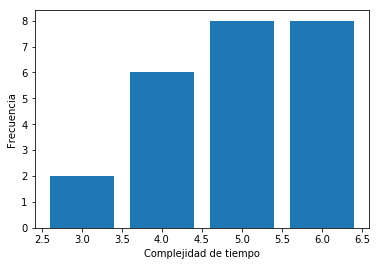

In [36]:
Result = PlotDistribution(4)

In [37]:
Result[1]

,Mejor Caso,Peor Caso,Caso Promedio
0,3,6,4.5


In [38]:
Result[0]

,t,P(t),Frequency
0,3,0.083333,2.0
1,4,0.250000,6.0
2,5,0.333333,8.0
3,6,0.333333,8.0


## Distribución de la complejidad de tiempo para n = 8

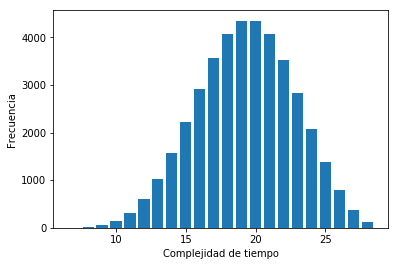

In [33]:
Result = PlotDistribution(8)

In [34]:
Result[1]

,Mejor Caso,Peor Caso,Caso Promedio
0,7,28,17.5


In [35]:
Result[0]

,t,P(t),Frequency
0,7,0.000050,2.0
1,8,0.000347,14.0
2,9,0.001290,52.0
3,10,0.003522,142.0
4,11,0.007788,314.0
5,12,0.014831,598.0
6,13,0.025198,1016.0
7,14,0.038839,1566.0
8,15,0.055010,2218.0
9,16,0.072222,2912.0


## Distribución de la complejidad de tiempo para n = 12

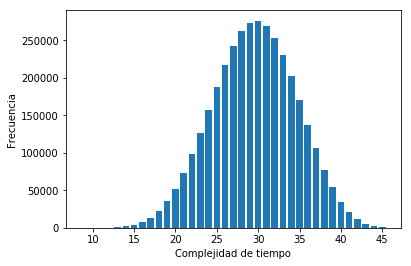

In [30]:
Result = PlotDistribution(10)

In [31]:
Result[1]

,Mejor Caso,Peor Caso,Caso Promedio
0,9,45,27.0


In [32]:
Result[0]

,t,P(t),Frequency
0,9,5.511464e-07,2.0
1,10,4.960317e-06,18.0
2,11,2.369929e-05,86.0
3,12,8.156966e-05,296.0
4,13,2.259700e-04,820.0
5,14,5.351631e-04,1942.0
6,15,1.124339e-03,4080.0
7,16,2.145613e-03,7786.0
8,17,3.781415e-03,13722.0
9,18,6.229056e-03,22604.0


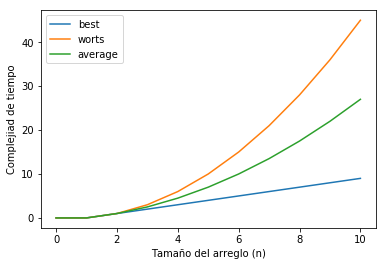

In [14]:
def complexityVsn(n):
    best = []
    worts = []
    average = []
    for i in range(n):
        returns = PlotDistribution(i)
        best.append(returns[1]['Mejor Caso'][0])
        worts.append(returns[1]['Peor Caso'][0])
        average.append(returns[1]['Caso Promedio'][0])
    plt.close()
    plt.plot(best)
    plt.plot(worts)
    plt.plot(average)
    plt.legend(['best','worts', 'average'])
    plt.xlabel('Tamaño del arreglo (n)')
    plt.ylabel('Complejiad de tiempo')
complexityVsn(11)
    